<a href="https://colab.research.google.com/github/ronaknavadiya/pytorch-projects-practice-/blob/Feature%2Foptimization/Multi_layer_perceptron_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/zalando-research/fashionmnist")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ronaknavadiya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist


100%|██████████| 68.8M/68.8M [00:00<00:00, 1.33GB/s]

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
#  set random seeds for reproducebility
torch.manual_seed(42)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:



df = pd.read_csv("/content/fashionmnist/fashion-mnist_train.csv")

# # Convert to small dataset due to CPU utilization
# df = df.sample(n=6000)
df.head()




,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(60000, 785)

# Visualise data

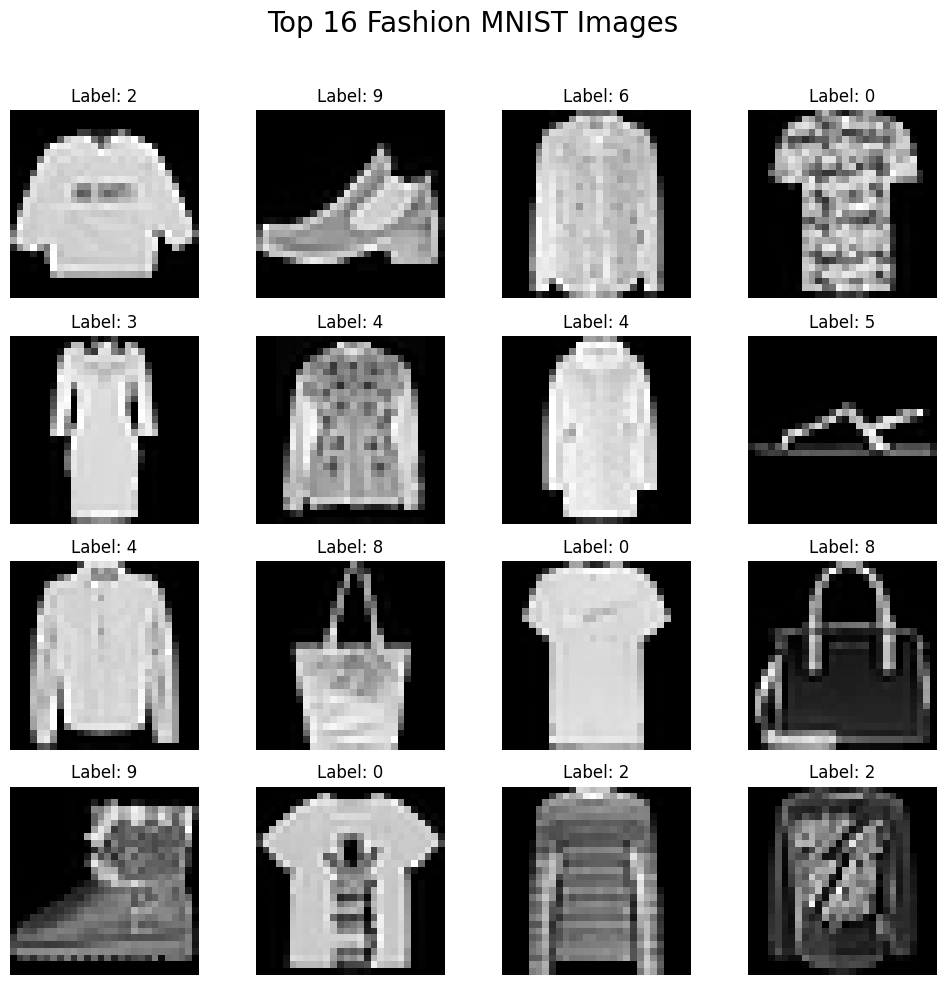

In [7]:
#  create 4 x 4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("Top 16 Fashion MNIST Images", fontsize=20)

# plot the first 16 images from df
for i, ax in enumerate(axes.flat):
    ax.imshow(df.iloc[i, 1:].values.reshape(28, 28), cmap="gray")
    ax.axis("off")
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [8]:
#  train test split

X = df.iloc[:,1:].values
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#  Scale the features  (max_pixel = 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
#  create custom dataset

class CustomDataset(Dataset):

  def __init__(self,features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    #  transformation


    return self.features[idx], self.labels[idx]


In [11]:
#  create train_dataset and test_dataset object

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

print(len(train_dataset))
print(len(test_dataset))

48000
12000


In [12]:
# train and test data loader

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## How my neural network will look like

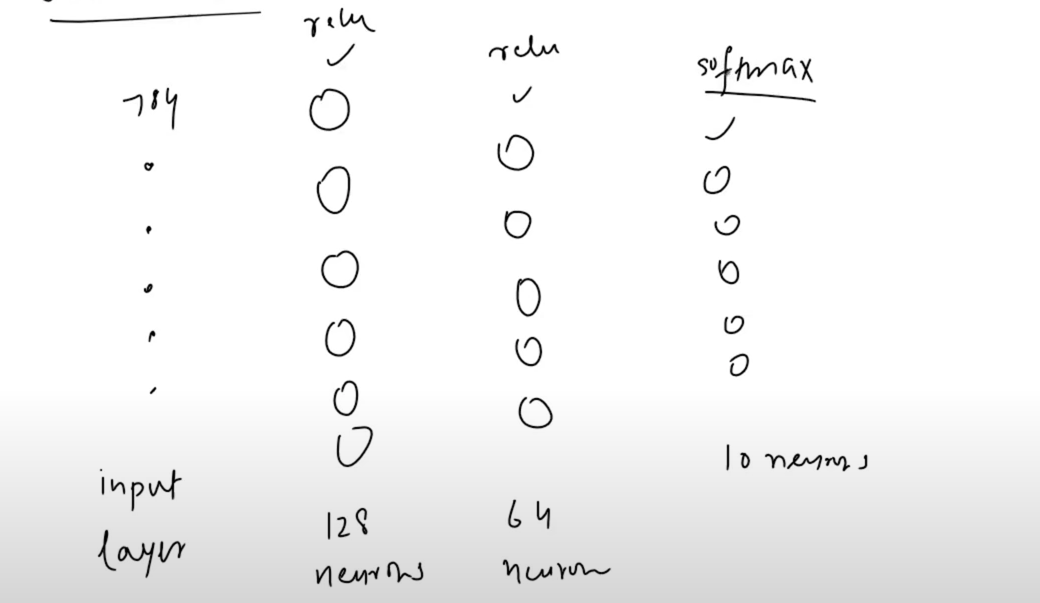

In [19]:
# create NN

class My_NN(nn.Module):

  def __init__(self, input_features):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(input_features, 128),
        nn.BatchNorm1d(128),  # optimmization
        nn.ReLU(),
        nn.Dropout(p=0.3), # optimmization
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),  # optimmization
        nn.ReLU(),
        nn.Dropout(p=0.3),  # optimmization
        nn.Linear(64, 10),
        # nn.Softmax()
    )

  def forward(self, dataset):
    return self.model(dataset)


In [20]:
# set learning rate and epochs
LR = 0.1
EPOCHS = 100

In [21]:
# instantiate the model
model = My_NN(X_train.shape[1])
model = model.to(device)

# loss function
criterian = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=LR, weight_decay= 1e-4)  # optimization

In [23]:
# training loop

for epoch in range(EPOCHS):
  total_epoch_loss = 0
  for features,labels in train_dataloader:

    features = features.to(device)
    labels = labels.to(device)

    # forward pass
    X_train_pred = model(features)

    # calculate loss
    loss = criterian(X_train_pred, labels)

    # back propogation
    optimizer.zero_grad()
    loss.backward()

    # update weights
    optimizer.step()

    total_epoch_loss += loss.item()

  print(f"Epoch: {epoch} Average Loss: { total_epoch_loss/len(train_dataloader)}")




Epoch: 0 Average Loss: 0.3019257122352719
Epoch: 1 Average Loss: 0.30152356820801895
Epoch: 2 Average Loss: 0.30037501432995
Epoch: 3 Average Loss: 0.3001291949277123
Epoch: 4 Average Loss: 0.297567400470376
Epoch: 5 Average Loss: 0.2948912753214439
Epoch: 6 Average Loss: 0.2930292654211322
Epoch: 7 Average Loss: 0.2928218520109852
Epoch: 8 Average Loss: 0.29168637714286644
Epoch: 9 Average Loss: 0.28980949429174263
Epoch: 10 Average Loss: 0.2902891413966815
Epoch: 11 Average Loss: 0.29098499891037743
Epoch: 12 Average Loss: 0.2852069290528695
Epoch: 13 Average Loss: 0.2883394708931446
Epoch: 14 Average Loss: 0.2873296262224515
Epoch: 15 Average Loss: 0.28221322283148764
Epoch: 16 Average Loss: 0.28739526589214803
Epoch: 17 Average Loss: 0.28223182685797416
Epoch: 18 Average Loss: 0.2820679281701644
Epoch: 19 Average Loss: 0.27987088856846093
Epoch: 20 Average Loss: 0.28074077950417997
Epoch: 21 Average Loss: 0.28436118315781156
Epoch: 22 Average Loss: 0.2789579902117451
Epoch: 23 Aver

In [24]:
# set model to eval mode
model.eval()

My_NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
# evalution code

total = 0
correct = 0

with torch.no_grad():
  for features,labels in test_dataloader:

    features = features.to(device)
    labels = labels.to(device)

    # forward pass
    X_test_pred = model(features)

    # get predictions
    predictions = torch.argmax(X_test_pred, dim=1)

    total = total + labels.size(0)
    correct = correct + (predictions == labels).sum().item()

    # loss
    loss = criterian(X_test_pred, labels)

  print(f"Test Accuracy: {correct/total * 100}% Loss: {loss}")





Test Accuracy: 89.06666666666668% Loss: 0.22811998426914215


In [26]:
# Training evalution code

total = 0
correct = 0

with torch.no_grad():
  for features,labels in train_dataloader:

    features = features.to(device)
    labels = labels.to(device)

    # forward pass
    X_train_pred = model(features)

    # get predictions
    predictions = torch.argmax(X_train_pred, dim=1)

    total = total + labels.size(0)
    correct = correct + (predictions == labels).sum().item()

    # loss
    loss = criterian(X_train_pred, labels)

  print(f"Train Accuracy: {correct/total * 100}% Loss: {loss}")



Train Accuracy: 94.6% Loss: 0.19884781539440155
